### 1. Set file path and Setup tools

In [1]:
import numpy as np
import awkward as ak
from coffea.nanoaod import NanoEvents
from uproot_methods import TLorentzVectorArray
import time

### 2. JaggedArray based analysis

In [2]:
## Read events
files = '/home/jkim/gitdir/PY3_HEP/coffea/data/280000/9F2BDB90-EAF5-B649-9DB1-71C1DE58252D.root'
events = NanoEvents.from_file(files)

/home/jkim/miniconda3/envs/pyHEP/lib/python3.8/site-packages/coffea/util.py:98: Awkward0Warning: In coffea version 0.7 (target date: January 2021), this will be an error.
(Set awkward1.deprecations_as_errors = True to get a stack trace now.)
TypeError: <class 'coffea.nanoaod.nanoevents.NanoEvents'> relies exclusively on awkward 0.x and will be removed in upcoming versions of coffea!
  warnings.warn(message, Awkward0Warning)
/home/jkim/miniconda3/envs/pyHEP/lib/python3.8/site-packages/coffea/util.py:98: Awkward0Warning: In coffea version 0.7 (target date: January 2021), this will be an error.
(Set awkward1.deprecations_as_errors = True to get a stack trace now.)
TypeError: <class 'coffea.nanoaod.nanoevents.NanoCollection'> relies exclusively on awkward 0.x and will be removed in upcoming versions of coffea!
  warnings.warn(message, Awkward0Warning)


In [3]:
## Read Electron
Electron = events.Electron

In [4]:
## Electron selection cut criteria ( We call it Electron cut-mask)
Electron_mask = (Electron.pt >20) & (np.abs(Electron.eta) < 2.5) & (Electron.cutBased > 1) 
Electron_mask 

<JaggedArray [[] [] [] ... [False] [False] []] at 0x7f334ce99a00>

In [5]:
Ele_Sel_mask = Electron[Electron_mask].counts > 1

In [6]:
Ele_channel_events = events[Ele_Sel_mask]

In [7]:
Ele = Ele_channel_events.Electron

In [21]:
# All possible pairs of Electron in each event
ele_pairs = Ele.distincts()

# TLorentz vector sum of ele_pairs
diele = ele_pairs.i0+ele_pairs.i1


# Choose different sign pair
diffsign_diele =  diele[diele.charge==0]


# choose maximum pt pair
leading_diffsign_diele = diffsign_diele[diffsign_diele.pt.argmax()]


In [23]:
Mee = leading_diffsign_diele.mass.content

In [24]:
import mplhep as hep
import matplotlib.pyplot as plt

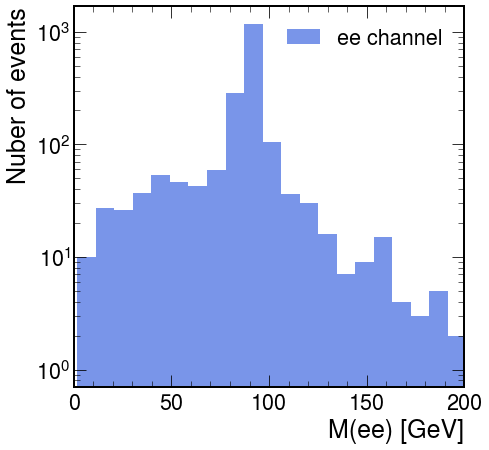

In [25]:
plt.figure(figsize=(7, 7))
plt.style.use(hep.style.CMS)
plt.hist(Mee,bins=50,color='royalblue',alpha=0.7,label='ee channel')
plt.xlim(0,200)
plt.xlabel('M(ee) [GeV]',fontsize=25)
plt.ylabel('Nuber of events',fontsize=25)
plt.yscale('log')
plt.legend()